# Otniel Abiezer - 1301180469

Import Library

In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Mount Google Drive (dari Google Colab)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
base_dir = '/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images'

Membaca seluruh file

In [5]:
for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/README_rpc-cv-images.txt
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/5VvYOvnkxKc8PIog.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/2DEYFsJ27UgVqv3W.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/0Ug54ifXRqqlZS2Z.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/65PVbRzrpzfdu8nJ.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/2M8LvUBGMOH1bsaz.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/3bkC6JAPog7xX9WO.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/4burI8a7jyfTRBl6.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/0657zSfiTYzP2jrl.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/1vQCX4af6hQmuwxZ.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/0Flw60Z2MAWWKn6S.png
/content/drive/MyDrive/Dataset/Jankenpon/rps-cv-images/scissors/4E0THA

Contoh

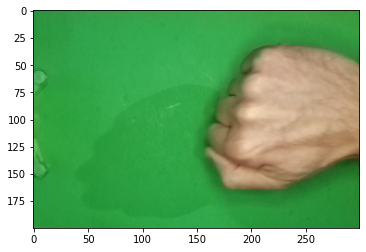

In [6]:
plt.imshow(plt.imread(base_dir+'/rock/MKU8h3j49NjuhQpi.png'))
plt.show()

Mengubah gambar menjadi array

In [7]:
batu = []
gunting = []
kertas = []

for dirname, _, filenames in os.walk(base_dir+'/rock'):
    for filename in filenames:
      dir_now = os.path.join(dirname, filename)
      img_now = load_img(dir_now)
      img_array = img_to_array(img_now)
      batu.append(img_array)

for dirname, _, filenames in os.walk(base_dir+'/scissors'):
    for filename in filenames:
      dir_now = os.path.join(dirname, filename)
      img_now = load_img(dir_now)
      img_array = img_to_array(img_now)
      gunting.append(img_array)

for dirname, _, filenames in os.walk(base_dir+'/paper'):
    for filename in filenames:
      dir_now = os.path.join(dirname, filename)
      img_now = load_img(dir_now)
      img_array = img_to_array(img_now)
      kertas.append(img_array)

Informasi

In [8]:
print('Banyak Gambar Batu = ', len(batu))
print('Lebar Gambar Batu = ', len(batu[0]))
print('Panjang Gambar Batu = ', len(batu[0][0]))
print('Pixel (RGB) = ', len(batu[0][0][0]))
print('Contoh Pixel = ', batu[0][0][0])

print('\nBanyak Gambar Gunting = ', len(gunting))
print('Lebar Gambar Gunting = ', len(gunting[0]))
print('Panjang Gambar Gunting = ', len(gunting[0][0]))
print('Pixel (RGB) = ', len(gunting[0][0][0]))
print('Contoh Pixel = ', gunting[0][0][0])

print('\nBanyak Gambar Kertas = ', len(kertas))
print('Lebar Gambar Kertas = ', len(kertas[0]))
print('Panjang Gambar Kertas = ', len(kertas[0][0]))
print('Pixel (RGB) = ', len(kertas[0][0][0]))
print('Contoh Pixel = ', kertas[0][0][0])

Banyak Gambar Batu =  726
Lebar Gambar Batu =  200
Panjang Gambar Batu =  300
Pixel (RGB) =  3
Contoh Pixel =  [ 38. 124.  41.]

Banyak Gambar Gunting =  750
Lebar Gambar Gunting =  200
Panjang Gambar Gunting =  300
Pixel (RGB) =  3
Contoh Pixel =  [ 18. 105.  27.]

Banyak Gambar Kertas =  712
Lebar Gambar Kertas =  200
Panjang Gambar Kertas =  300
Pixel (RGB) =  3
Contoh Pixel =  [ 35. 119.  47.]


Mengubah menjadi 1D array

In [9]:
batu_flatten = []
gunting_flatten = []
kertas_flatten = []

for i in range(len(batu)):
  data_batu = batu[i].flatten()
  batu_flatten.append(data_batu)

for i in range(len(gunting)):
  data_gunting = gunting[i].flatten()
  gunting_flatten.append(data_gunting)

for i in range(len(kertas)):
  data_kertas = kertas[i].flatten()
  kertas_flatten.append(data_kertas)

Nama Fitur

In [10]:
nama_fitur = []

for i in range(60000):
  nama_fitur.append('R' + str(i))
  nama_fitur.append('G' + str(i))
  nama_fitur.append('B' + str(i))

Menggabungkan ketiga kelas/label

In [11]:
batu_np = np.array(batu_flatten)
gunting_np = np.array(gunting_flatten)
kertas_np = np.array(kertas_flatten)

calon_dataframe = np.concatenate((batu_np, gunting_np, kertas_np))

Ukuran akhir

In [12]:
print(calon_dataframe.shape)

(2188, 180000)


Ubah ke dataframe

In [13]:
df_jankenpon = pd.DataFrame(calon_dataframe, columns=nama_fitur)

In [14]:
df_jankenpon.head()

,R0,G0,B0,R1,G1,B1,R2,G2,B2,R3,...,B59996,R59997,G59997,B59997,R59998,G59998,B59998,R59999,G59999,B59999
0,38.0,124.0,41.0,36.0,121.0,40.0,36.0,121.0,40.0,35.0,...,45.0,39.0,127.0,45.0,39.0,127.0,45.0,41.0,124.0,44.0
1,38.0,115.0,16.0,39.0,116.0,17.0,40.0,117.0,19.0,38.0,...,40.0,128.0,93.0,39.0,129.0,94.0,40.0,126.0,93.0,39.0
2,30.0,121.0,45.0,32.0,124.0,47.0,31.0,123.0,46.0,32.0,...,27.0,20.0,95.0,24.0,21.0,96.0,25.0,24.0,96.0,29.0
3,21.0,115.0,26.0,23.0,120.0,28.0,22.0,119.0,27.0,22.0,...,10.0,13.0,83.0,9.0,11.0,83.0,6.0,10.0,78.0,5.0
4,39.0,125.0,44.0,40.0,126.0,45.0,37.0,122.0,41.0,36.0,...,45.0,39.0,132.0,46.0,39.0,132.0,46.0,42.0,131.0,46.0


Melabelkan

In [15]:
label = []

for i in range(len(batu)):
  label.append(0)

for i in range(len(gunting)):
  label.append(1)

for i in range(len(kertas)):
  label.append(2)

print(len(label))

2188


In [16]:
df_jankenpon['Label'] = label

In [17]:
df_jankenpon.head()

,R0,G0,B0,R1,G1,B1,R2,G2,B2,R3,...,R59997,G59997,B59997,R59998,G59998,B59998,R59999,G59999,B59999,Label
0,38.0,124.0,41.0,36.0,121.0,40.0,36.0,121.0,40.0,35.0,...,39.0,127.0,45.0,39.0,127.0,45.0,41.0,124.0,44.0,0
1,38.0,115.0,16.0,39.0,116.0,17.0,40.0,117.0,19.0,38.0,...,128.0,93.0,39.0,129.0,94.0,40.0,126.0,93.0,39.0,0
2,30.0,121.0,45.0,32.0,124.0,47.0,31.0,123.0,46.0,32.0,...,20.0,95.0,24.0,21.0,96.0,25.0,24.0,96.0,29.0,0
3,21.0,115.0,26.0,23.0,120.0,28.0,22.0,119.0,27.0,22.0,...,13.0,83.0,9.0,11.0,83.0,6.0,10.0,78.0,5.0,0
4,39.0,125.0,44.0,40.0,126.0,45.0,37.0,122.0,41.0,36.0,...,39.0,132.0,46.0,39.0,132.0,46.0,42.0,131.0,46.0,0


Random Forest Feature Importance

In [20]:
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X,y)

Drop fitur dengan nilai importance = 0

In [23]:
top_fitur = pd.Series(model_rf.feature_importances_, index=X.columns)
drop_fitur = []

# Mendapatkan nama fitur dengan nilai importance = 0
for i in range(0, len(top_fitur)):
  if (top_fitur[i] == 0):
    drop_fitur.append(top_fitur.index[i])

# Melakukan drop fitur
top_fitur = top_fitur.drop(drop_fitur)
print(len(top_fitur))

10144


Banyaknya fitur dengan nilai importances >0 dari masing-masing Random Forest dan AdaBoost

In [24]:
best_feature = []

for i in range(0,len(top_fitur)):
    best_feature.append(top_fitur.index[i])

best_feature.append('Label')
df_jankenpon = df_jankenpon[best_feature]
df_jankenpon.head()

,G19,G25,R28,R39,R67,R90,B100,B102,B131,R133,...,G59949,R59950,G59956,B59959,G59960,R59969,G59969,R59973,G59994,Label
0,124.0,126.0,38.0,38.0,41.0,42.0,53.0,53.0,52.0,42.0,...,138.0,39.0,133.0,49.0,135.0,37.0,133.0,39.0,126.0,0
1,119.0,121.0,42.0,42.0,46.0,54.0,33.0,33.0,41.0,69.0,...,138.0,187.0,130.0,57.0,127.0,180.0,129.0,181.0,92.0,0
2,129.0,126.0,30.0,36.0,39.0,37.0,57.0,57.0,59.0,36.0,...,120.0,27.0,117.0,38.0,110.0,24.0,111.0,23.0,96.0,0
3,129.0,131.0,31.0,33.0,37.0,43.0,40.0,42.0,41.0,43.0,...,108.0,23.0,104.0,20.0,103.0,20.0,99.0,16.0,86.0,0
4,130.0,131.0,42.0,43.0,44.0,45.0,56.0,57.0,55.0,48.0,...,145.0,40.0,140.0,52.0,141.0,39.0,139.0,39.0,132.0,0


X (kecuali label)

In [25]:
X = df_jankenpon.iloc[:,:-1]
X.head()

,G19,G25,R28,R39,R67,R90,B100,B102,B131,R133,...,R59940,G59949,R59950,G59956,B59959,G59960,R59969,G59969,R59973,G59994
0,124.0,126.0,38.0,38.0,41.0,42.0,53.0,53.0,52.0,42.0,...,39.0,138.0,39.0,133.0,49.0,135.0,37.0,133.0,39.0,126.0
1,119.0,121.0,42.0,42.0,46.0,54.0,33.0,33.0,41.0,69.0,...,198.0,138.0,187.0,130.0,57.0,127.0,180.0,129.0,181.0,92.0
2,129.0,126.0,30.0,36.0,39.0,37.0,57.0,57.0,59.0,36.0,...,29.0,120.0,27.0,117.0,38.0,110.0,24.0,111.0,23.0,96.0
3,129.0,131.0,31.0,33.0,37.0,43.0,40.0,42.0,41.0,43.0,...,23.0,108.0,23.0,104.0,20.0,103.0,20.0,99.0,16.0,86.0
4,130.0,131.0,42.0,43.0,44.0,45.0,56.0,57.0,55.0,48.0,...,37.0,145.0,40.0,140.0,52.0,141.0,39.0,139.0,39.0,132.0


y (label)

In [26]:
y = df_jankenpon.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

Split Data Train dan Data Test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, stratify=y)

Model

In [30]:
mlp_klasifikasi = MLPClassifier()
mlp_klasifikasi.fit(X_train, y_train)

MLPClassifier()

Akurasi Data Train

In [34]:
score = cross_val_score(mlp_klasifikasi, X_train, y_train, scoring="accuracy", cv=5)
print("Akurasi masing-masing = ", score)
print("Rata-rata = ", score.mean())

Akurasi masing-masing =  [0.83428571 0.83714286 0.34285714 0.86857143 0.33142857]
Rata-rata =  0.6428571428571428


Akurasi Data Test

In [38]:
mlp_prediksi = mlp_klasifikasi.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test, mlp_prediksi))

Accuracy :  0.3424657534246575
